<a href="https://colab.research.google.com/github/nathaliavasconcelos-create/MVP_SMSSpamAnalysis.ipynb/blob/main/MVP_SMSSpamAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP - Análise de potenciais SPAMs em SMS

Aluna: Nathalia Vasconcelos Cardoso Rodrigues


# 1.Introdução

O presente MVP tem como objetivo analisar o dataset referente a mensagens de texto, doravante SMSs, mensagens de texto, contendo potenciais conteúdos de SPAM. O dataset foi obtido a partir do link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset.  Além disso, é possível encontrá-lo disponível no repositório UC Irvine.

Para resolver o problema de classificação proposto, serão adotados alguns algoritmos de classificação, a saber: SVM, Random Forest, KNN e Naive Bayes. Após a aplicação de cada algoritmo, os resultados obtidos serão comparados, de modo a observar os melhores desempenhos.

Relevância

A seguir, apresenta-se o código gerado para trabalhar o problema de classificação de mensagens de texto em "spam" ou "ham" (não-spam). É importante destacar que foram adotadas duas estratégias: divisão do conjunto de dados em training e teste e uso da validação cruzada.


*   Imports iniciais




In [2]:
#Imports necessários
import pandas as pd #import da biblioteca Panda
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split #para particionar em bases de treino e teste (holdout)
from sklearn.neighbors import KNeighborsClassifier #para importar algoritmo KNN
from sklearn.naive_bayes import MultinomialNB #para importar algoritmo Naive Bayes
from sklearn.tree import DecisionTreeClassifier #para importar o algoritmo Árvore de Classificação
from sklearn.svm import SVC #para importar o algoritmo SVM
from sklearn.linear_model import LogisticRegression #para importar o algoritmo de Regressão Logística
from sklearn.ensemble import RandomForestClassifier #para importar o algoritmo Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #para a exibição da acurácia do modelo, relatório de classificação e a matriz de confusão
import seaborn as sns #para elaboração de gráficos estatísticos
import matplotlib.pyplot as plt #para exibição dos gráficos

# 2. O dataset

Desenvolvido por Tiago Almeida e José Hidalgo, o dataset é composto por 5 colunas, saber: as classes "spam" e "ham", o texto de cada SMS e duas colunas sem nome. Cabe destacar que o dataset não contém valores nulos.

A composição deste dataset foi feita com base em fontes disponíveis de maneira gratuita e online. Segundo informações da página do dataset no Repositório da UC Irvine:
- Uma coleção de 425 mensagens de spam extraída manualmente do site Grumbletext;
- Um subconjunto de 3.375 mensagens SMS escolhidas aleatoriamente do NUS SMS Corpus (NSC);
- Uma lista de 450 mensagens SMS 'ham' coletadas da tese de doutorado de Caroline Tag;
- o SMS Spam Corpus v.0.1 Big. Possui 1.002 SMS "ham" e 322 SMS "spam".


Por fim, o dataset está desbalanceado, na medida em que, os dados considerados "ham" representam 87% do total, ao passo que os dados de "spam" perfazem 13% do total.




*   Import do dataset e pré-processamento dos dados





In [4]:
#url a importar
url_dados = 'https://github.com/nathaliavasconcelos-create/MVP_SMSSpamAnalysis.ipynb/blob/main/spam_dataset.csv'

# Carregar o dataset e realizar o enconding, dado que o dataset possuía caracteres que não poderiam ser lidos
df = pd.read_csv(url_dados.replace('/blob/', '/raw/'), encoding='latin-1')

# Verificar as primeiras linhas do dataset
print(df.head())

# Verificar as distribuições dos valores de "spam"/"ham", lembrando que a coluna em que este
#dado é apresentado no dataset tem como nome v1.
print(df['v1'].value_counts())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
v1
ham     4825
spam     747
Name: count, dtype: int64


In [5]:
# Verificar valores nulos
# Ainda que a informação sobre ausência de valores nulos seja oferecida pelos próprios autores do dataset
print(df.isnull().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


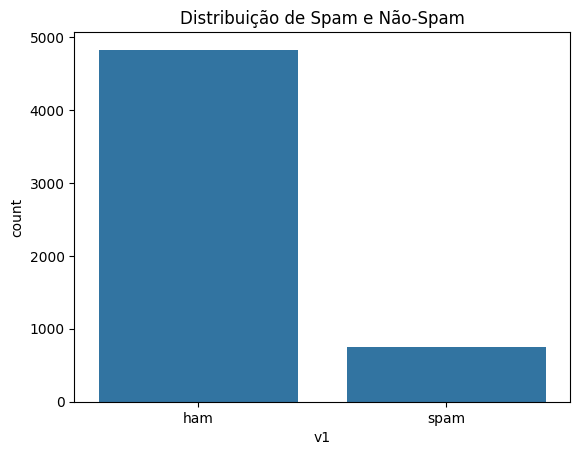

In [6]:
# Visualizar a distribuição dos valores de Spam x Não-Spam ('Ham') no dataset
sns.countplot(x='v1', data=df)
plt.title('Distribuição de Spam e Não-Spam')
plt.show()



*   Pré-processamento do dataset



# 3. Pré-processamento do dataset


In [7]:
# Etapa pré-processamento do dataset
def preprocess_text(text):
    text = text.lower()  # Converter o conteúdo do texto para letras minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remover pontuação
    return text

# Aplicar pré-processamento
df['processed_text'] = df['v2'].apply(preprocess_text)

# Usar TF-IDF para transformar o texto em vetores numéricos
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['processed_text'])

# Rótulos
y = df['v1']

In [8]:
print(df['v1'].unique())

['ham' 'spam']


In [9]:
# Verificar valores NaN
print(df['v1'].isnull().sum())

0


In [10]:
# Remover espaços extras das labels
df['v1'] = df['v1'].str.strip()

# Verificar novamente os valores únicos
print(df['v1'].unique())

['ham' 'spam']


In [11]:
# Mapear as labels 'spam' e 'ham' para valores numéricos
spam_mapping = {'spam': 2,'ham': 1}
df['v1'] = df['v1'].map(spam_mapping)
# Verificar a transformação
print(df.head())

   v1                                                 v2 Unnamed: 2  \
0   1  Go until jurong point, crazy.. Available only ...        NaN   
1   1                      Ok lar... Joking wif u oni...        NaN   
2   2  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   1  U dun say so early hor... U c already then say...        NaN   
4   1  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4                                     processed_text  
0        NaN        NaN  go until jurong point crazy available only in ...  
1        NaN        NaN                            ok lar joking wif u oni  
2        NaN        NaN  free entry in 2 a wkly comp to win fa cup fina...  
3        NaN        NaN        u dun say so early hor u c already then say  
4        NaN        NaN  nah i dont think he goes to usf he lives aroun...  


4. Os algoritmos adotados


4.1 O algoritmo SVM

In [12]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Inicializar e treinar o modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Fazer previsões
y_pred_svm = svm_model.predict(X_test)

# Avaliar a performance
print(f'Acurácia SVM: {accuracy_score(y_test, y_pred_svm):.4f}')
print(classification_report(y_test, y_pred_svm))
print (confusion_matrix(y_test, y_pred_svm))


Acurácia SVM: 0.9779
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.99      0.84      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

[[1451    2]
 [  35  184]]


In [13]:
# Inicializar e treinar o modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliar a performance
print(f'Acurácia Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}')
print(classification_report(y_test, y_pred_rf))

Acurácia Random Forest: 0.9731
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       1.00      0.79      0.89       219

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



O algoritmo KNN

Para este algoritmo em especial, foi-se ajustando o hiperparâmetro "neighbors" ("vizinho"), variando nos valores 1,3 e 5, de modo a observar possíveis alterações nas métricas obtidas.

Acurácia KNN: 0.9432
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1453
        spam       1.00      0.57      0.72       219

    accuracy                           0.94      1672
   macro avg       0.97      0.78      0.85      1672
weighted avg       0.95      0.94      0.94      1672



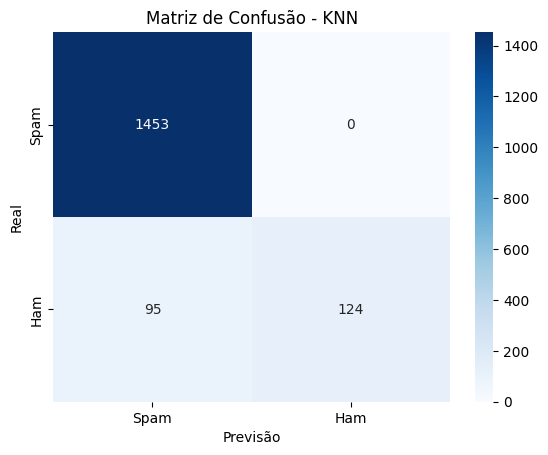

In [14]:
# Inicializar o modelo KNN (com 1 vizinho como padrão)
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

# Fazer previsões
y_pred_knn = knn_model.predict(X_test)

# Avaliar a performance
print(f'Acurácia KNN: {accuracy_score(y_test, y_pred_knn):.4f}')
print(classification_report(y_test, y_pred_knn))

# Matriz de Confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - KNN')
plt.show()

Acurácia KNN: 0.9139
              precision    recall  f1-score   support

         ham       0.91      1.00      0.95      1453
        spam       1.00      0.34      0.51       219

    accuracy                           0.91      1672
   macro avg       0.95      0.67      0.73      1672
weighted avg       0.92      0.91      0.89      1672



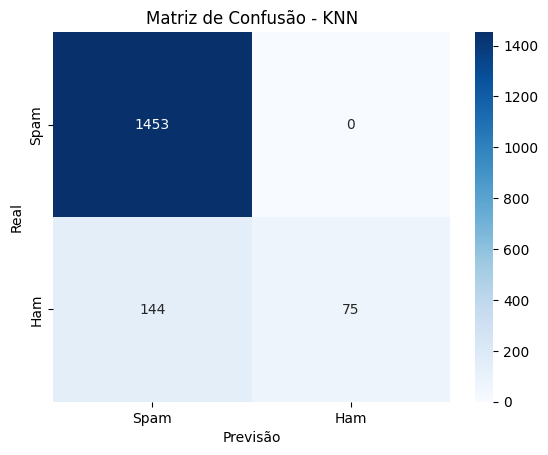

In [15]:
# Inicializar o modelo KNN (com 3 vizinho como padrão)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Fazer previsões
y_pred_knn = knn_model.predict(X_test)

# Avaliar a performance
print(f'Acurácia KNN: {accuracy_score(y_test, y_pred_knn):.4f}')
print(classification_report(y_test, y_pred_knn))

# Matriz de Confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - KNN')
plt.show()

Acurácia KNN: 0.9049
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1453
        spam       1.00      0.27      0.43       219

    accuracy                           0.90      1672
   macro avg       0.95      0.64      0.69      1672
weighted avg       0.91      0.90      0.88      1672



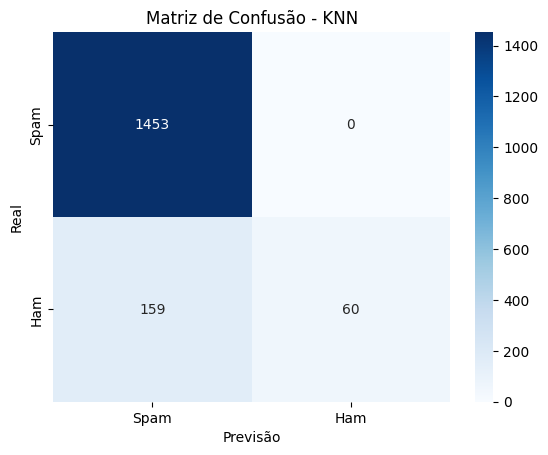

In [16]:
# Inicializar o modelo KNN (com 5 vizinhos como padrão)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Fazer previsões
y_pred_knn = knn_model.predict(X_test)

# Avaliar a performance
print(f'Acurácia KNN: {accuracy_score(y_test, y_pred_knn):.4f}')
print(classification_report(y_test, y_pred_knn))

# Matriz de Confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - KNN')
plt.show()

Acurácia Naive Bayes: 0.9635
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.72      0.84       219

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



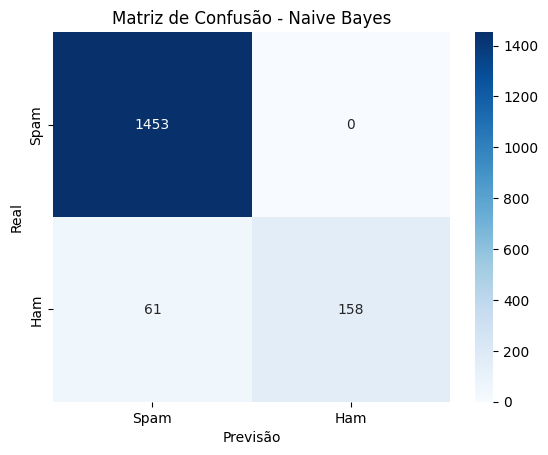

In [17]:
# Inicializar o modelo Naive Bayes
nb_model = MultinomialNB ()
nb_model.fit(X_train, y_train)

# Fazer previsões
y_pred_nb = nb_model.predict(X_test)

# Avaliar a performance
print(f'Acurácia Naive Bayes: {accuracy_score(y_test, y_pred_nb):.4f}')
print(classification_report(y_test, y_pred_nb))

# Matriz de Confusão
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()


In [20]:
#Inicializar o modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Fazer previsões
y_pred_dt = dt_model.predict(X_test)

# Avaliar a performance
print(f'Acurácia Decision Tree: {accuracy_score(y_test, y_pred_dt):.4f}')
print(classification_report(y_test, y_pred_dt))

Acurácia Decision Tree: 0.9653
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1453
        spam       0.91      0.81      0.86       219

    accuracy                           0.97      1672
   macro avg       0.94      0.90      0.92      1672
weighted avg       0.96      0.97      0.96      1672



In [28]:
#Inicializar o modelo
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = lr_model.predict(X_test)

# Avaliar a performance
print(f'Acurácia Regressão Logística: {accuracy_score(y_test, y_pred_rf):.4f}')
print(classification_report(y_test, y_pred_rf))

Acurácia Regressão Logística: 0.9743
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1453
        spam       1.00      0.80      0.89       219

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672



Acurácia Naive Bayes: 0.9635
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.72      0.84       219

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



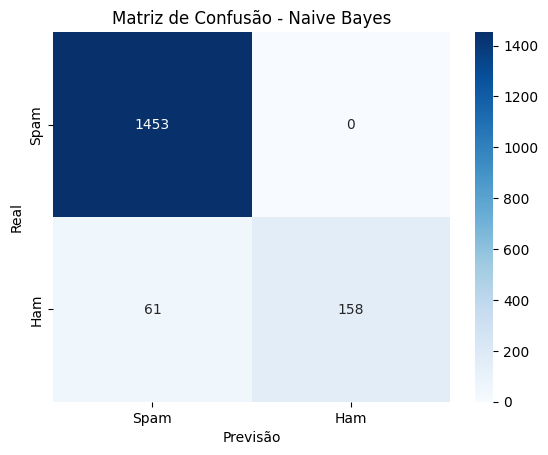

In [25]:
# Inicializar o modelo Naive Bayes
nb_model = MultinomialNB ()
nb_model.fit(X_train, y_train)

# Fazer previsões
y_pred_nb = nb_model.predict(X_test)

# Avaliar a performance
print(f'Acurácia Naive Bayes: {accuracy_score(y_test, y_pred_nb):.4f}')
print(classification_report(y_test, y_pred_nb))

# Matriz de Confusão
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()


Usando validação cruzada


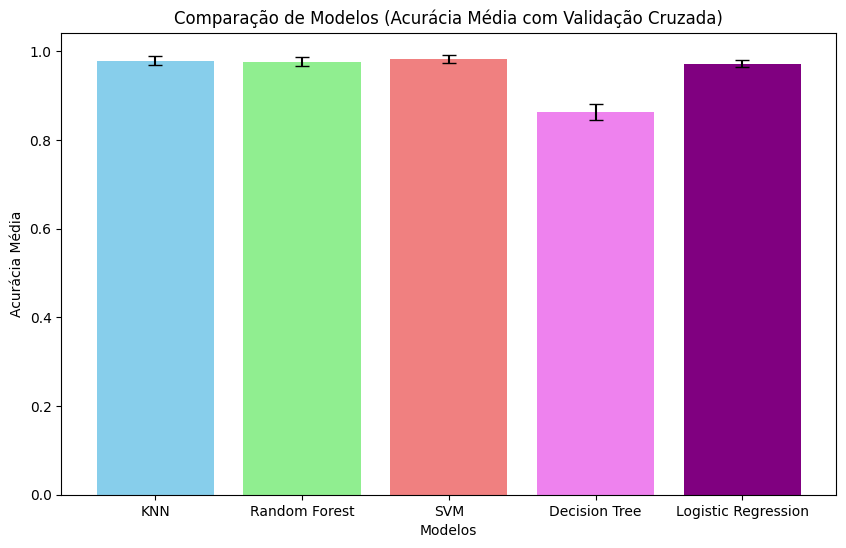

In [8]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Carregar o dataset (substitua isso pelo seu próprio dataset)
# Exemplo com dataset de dígitos para ilustrar
data = load_digits()
X = data.data  # variáveis de entrada
y = data.target  # variáveis de saída

# Padronizar os dados (muito importante para KNN e SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir o número de folds para validação cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definir os classificadores
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)  # max_iter ajustado para garantir convergência
}

# Listas para armazenar os resultados
model_names = []
mean_accuracies = []
std_devs = []

# Aplicar validação cruzada
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    model_names.append(name)
    mean_accuracies.append(cv_scores.mean())
    std_devs.append(cv_scores.std())

# Criando o gráfico comparativo
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_accuracies, yerr=std_devs, capsize=5, color=['skyblue', 'lightgreen', 'lightcoral', 'violet', 'purple'])
plt.title('Comparação de Modelos (Acurácia Média com Validação Cruzada)')
plt.xlabel('Modelos')
plt.ylabel('Acurácia Média')
plt.show()
